In [147]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [148]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/oil_dataset.csv')

In [149]:
df.head()

,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907
2,0.418,2013.507,82.748964
3,8.193,1420.607,84.760494
4,5.210,951.957,54.588671


In [150]:
print(df['Depth'].shape)
print(df['Mendacium'].shape)


(1000,)
(1000,)


In [151]:
df.shape

(1000, 3)

<Axes: xlabel='Price', ylabel='Depth'>

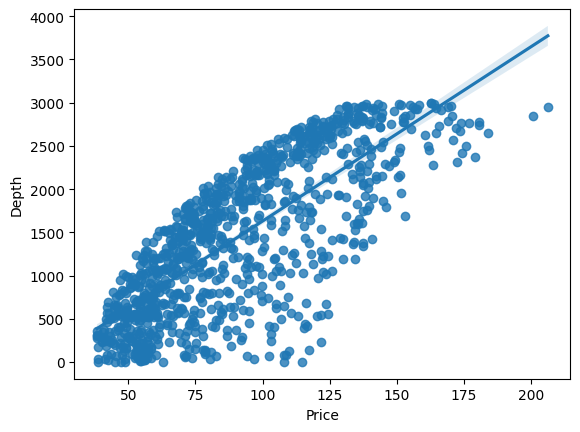

In [152]:
sns.regplot(y='Depth',x='Price',data=df)

<Axes: xlabel='Mendacium', ylabel='Price'>

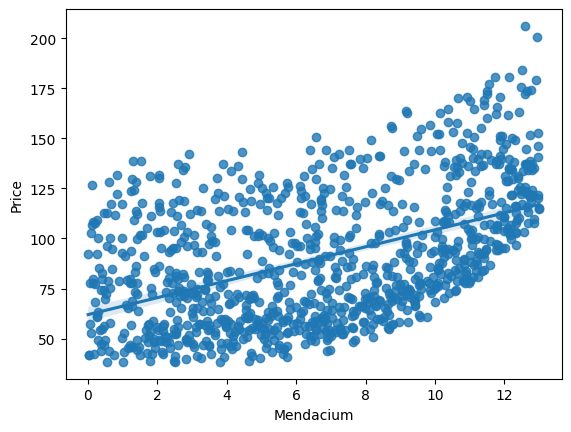

In [153]:
sns.regplot(x='Mendacium',y='Price',data=df)

In [154]:
df[['Depth']].corrwith(df['Price'])


Depth    0.762699
dtype: float64

In [155]:
df[['Mendacium']].corrwith(df['Price'])


Mendacium    0.478719
dtype: float64

In [156]:
from sklearn.model_selection import   train_test_split
from sklearn.linear_model import LinearRegression


In [157]:
X=df.drop(columns=['Price'],axis=1)
y=df[['Price']]

In [158]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


In [159]:
from sklearn.pipeline import Pipeline

In [160]:
model=Pipeline(steps=[
    ('Linear',LinearRegression()),
])


In [161]:
model.fit(Xtrain,ytrain)

Pipeline(steps=[('Linear', LinearRegression())])

In [162]:
model.score(Xtrain,ytrain)


0.8413330692350336

In [163]:

model.score(Xtest,ytest)


0.8492267945470043

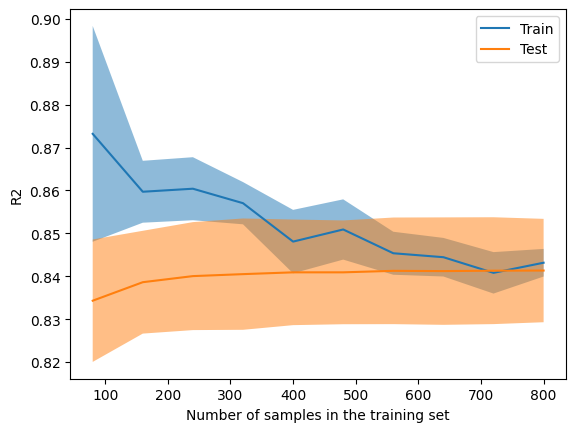

In [164]:
from sklearn.model_selection import LearningCurveDisplay

disp = LearningCurveDisplay.from_estimator(
  LinearRegression(),
    X,y,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
)